In [1]:
import numpy as np
from pandas import read_csv
from multiprocessing import Process, Queue
from math import floor
from scipy.io import loadmat 
import matplotlib.pyplot as plt




171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426
171.668979426


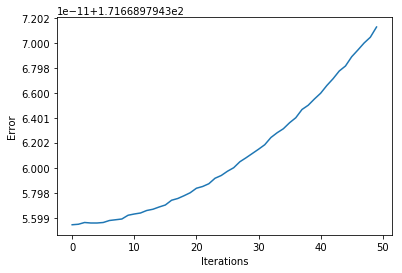

In [7]:

filename = 'regression_dataset.mat'
array = loadmat(filename)

X = np.array(array['train'])
Y = np.array(array['train_y'])
nr,nc = X.shape

#Normalization-1
minimum = X.min(0);
maximum = X.max(0);

for i in np.arange(nc):
    if(maximum[i]!=minimum[i]):
        X[:,i] = (X[:,i]-minimum[i]) / (maximum[i]-minimum[i]);
    else:
        X[:,i] = np.ones(nr)

#Normalization-2
X = X - X.mean(axis=0)
nrm = np.linalg.norm(X,axis = 0);
X = X/nrm;
alpha = 0.000010
#########
def func(wt,index,core):

    t1 = np.dot(X,wt).reshape(nr,1)
#     print t1.shape
    t2 = t1- Y
    t2 = t2.reshape(nr,1)
#     print t2.shape
    g = np.dot(X[:,index].T,t2)
#     print g.shape
    wt[index] = wt[index] - alpha * g/nr
    
#     print 'wt'
    if core == 0:
        q0.put(wt)
    elif core==1:
        q1.put(wt)
#     else:
#         q2.put(wt)
#     print 'pushed into Queue'


    # alpha = alphas[l];
l=50
err = np.zeros(l)
c=0    
# diff = int(floor(nc/3))
w = np.zeros(nc,dtype = np.float64)
q0 = Queue()
q1 = Queue()
q2 = Queue()
for i in np.arange(l):
    perm = np.random.permutation(nc)
    ind0 = 0
    ind1 = 1
#     ind2 = perm[2*diff:nc]
    p0 = Process(target = func, args =[w,ind0,0] )
    p1 = Process(target = func, args =[w,ind1,1] )
#     p2 = Process(target = func, args =[w,ind2,2] )

    p0.start()
    p1.start()
#     p2.start()
#     print 'Started'

    w[ind0] = (q0.get(True))[ind0]
    w[ind1] = (q1.get(True))[ind1]
#     w[ind2] = (q2.get(True))[ind2]
#     print 'w computed'


    #res = np.append(q0.get(True), q1.get(True))
    #res = np.append(res,  q2.get(True))
    p0.join()
    #print 'p0 END'
    p1.join()
    #print 'p1 END'
#     p2.join()
    #print 'p2 END'
#     print 'Completed'
    pred = np.dot(X , w)#.reshape(nr,1); 

    # print 'Prediction'
    differ = (pred-Y)
    #print Y.shape
    #print differ.shape
    MSE = np.mean( np.square(differ) );
    print (MSE)
    err[c] = MSE
    c+=1
plt.plot(err)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()
